In [14]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install itkwidgets

Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import nibabel as nib #read/write access to some common neuroimaging file formats
import itk            #jupyter widgets to visualise images in 2d and 3d
import itkwidgets
from ipywidgets import interact,interactive,IntSlider,ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [46]:
#define the image path and load the data
image_path="C:/Users/91703/Desktop/project/AD/ad14/ad14.nii"
image_obj=nib.load(image_path)
print(f'Type of the image {type(image_obj)}.')


Type of the image <class 'nibabel.nifti1.Nifti1Image'>.


In [47]:
#extract data as numpy array
image_data=image_obj.get_fdata()
type(image_data)

numpy.memmap

In [48]:
#get the image shhape and print it out
height, width, depth=image_data.shape
print(f"The image object has the following dimensions:\nheight={height}\nwidth={width}\ndepth={depth}\n.")

The image object has the following dimensions:
height=192
width=192
depth=160
.


In [49]:
#select random layer number 
maxval=180
i=np.random.randint(0,maxval)
print(f'plotting layer:Layer {i} of Image')
plt.imshow(image_data[:, :, i],cmap='gray')
plt.axis('off')
plt.show()


plotting layer:Layer 175 of Image


IndexError: index 175 is out of bounds for axis 2 with size 160

In [50]:
# Transpose the image data to get the top view
top_view_data = np.transpose(image_data, (1, 0, 2))

# Display the top view using itkwidgets
itkwidgets.view(top_view_data)


Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [38]:
import ipywidgets as widgets

def plot_y_plane(layer):
    plt.figure(figsize=(5, 5))
    plt.imshow(image_data[:, layer, :], cmap='gray')
    plt.title(f'Z-Plane of MRI Scan (Layer {layer})', family='Arial', fontsize=20)
    plt.axis('off')
    plt.show()

# Create a text box widget for user input
layer_textbox = widgets.IntText(description='Enter Layer Number:', min=0, max=image_data.shape[1]-1, value=0)

# Define a function to handle user input and plot the y-plane
def handle_layer_change(change):
    layer = change.new
    plot_y_plane(layer)

# Connect the text box widget to the function
layer_textbox.observe(handle_layer_change, names='value')

# Display the text box widget
display(layer_textbox)


IntText(value=0, description='Enter Layer Number:')

IntText(value=0, description='Enter Layer Number:')

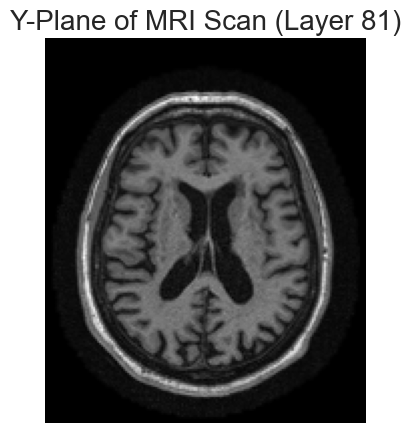

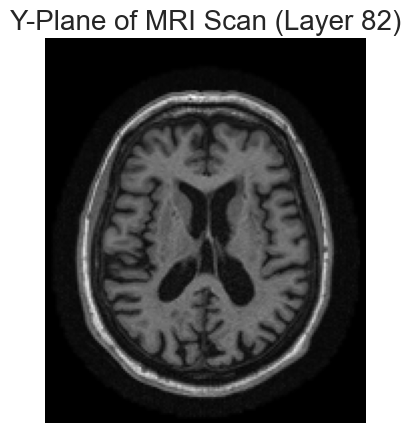

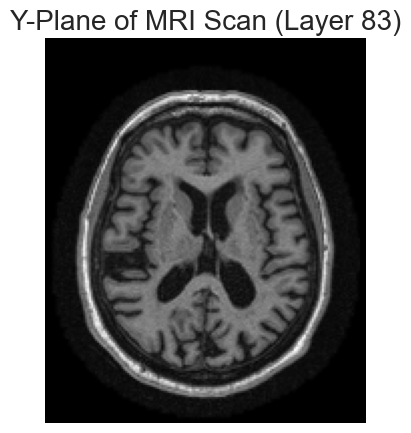

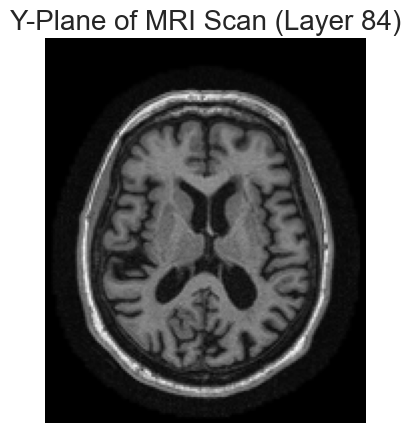

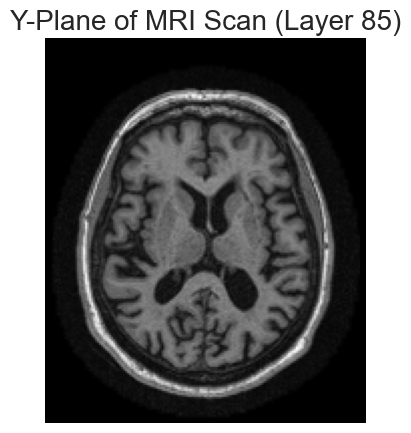

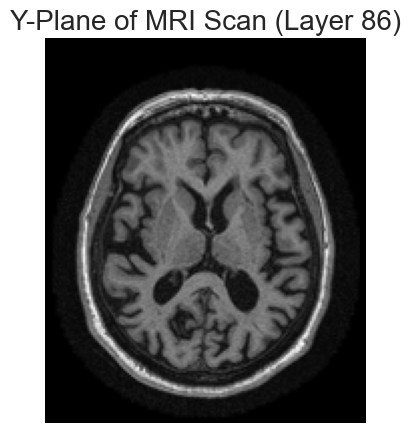

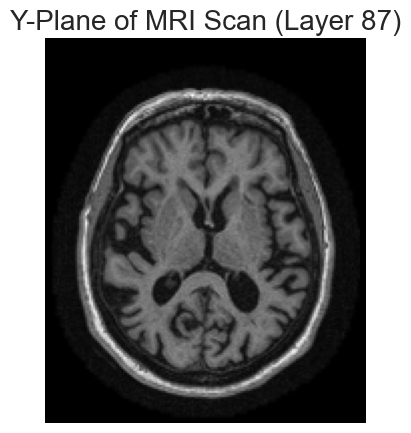

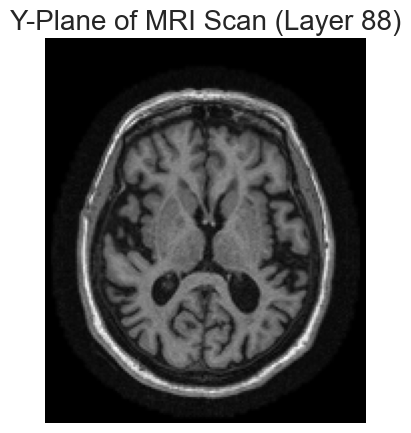

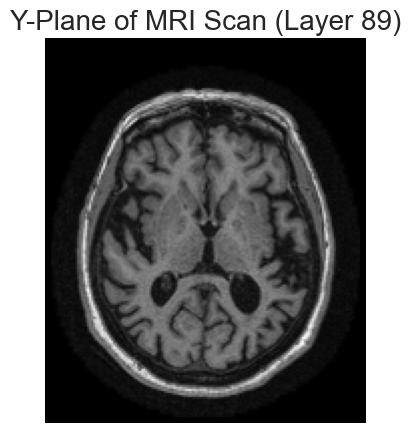

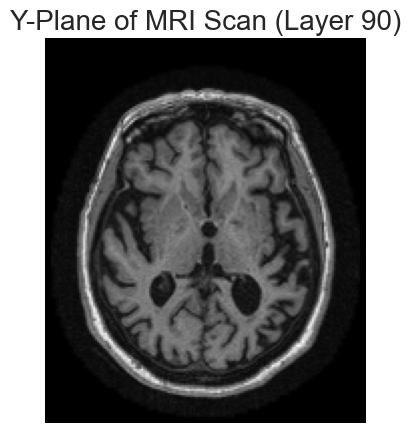

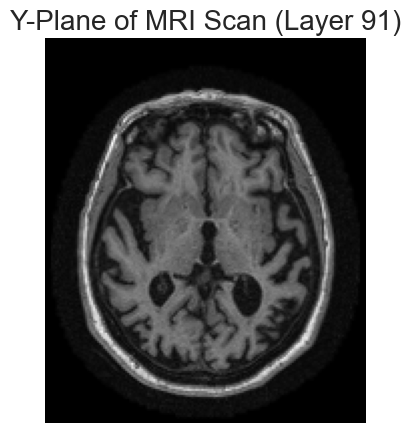

In [51]:
import ipywidgets as widgets

def plot_z_plane(layer):
    plt.figure(figsize=(5, 5))
    plt.imshow(image_data[layer, :, :], cmap='gray')
    plt.title(f'Y-Plane of MRI Scan (Layer {layer})', family='Arial', fontsize=20)
    plt.axis('off')
    plt.show()

# Create a text box widget for user input
layer_textbox = widgets.IntText(description='Enter Layer Number:', min=0, max=image_data.shape[0]-1, value=0)

# Define a function to handle user input and plot the z-plane
def handle_layer_change(change):
    layer = change.new
    plot_z_plane(layer)

# Connect the text box widget to the function
layer_textbox.observe(handle_layer_change, names='value')

# Display the text box widget
display(layer_textbox)
